<a href="https://colab.research.google.com/github/mohanrajmit/Image-Read/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [6]:
!git clone https://github.com/mohanrajmit/Image-Read.git

fatal: destination path 'Image-Read' already exists and is not an empty directory.


In [0]:
label_name=["cats","dogs","panda"]

In [0]:

def load():
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split("/")[-2]
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)
			
			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [8]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("Image-Read/animals"))
print(imagePaths)

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
#sp = SimplePreprocessor(32, 32)
#sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = load()

data = data.reshape((data.shape[0], 3072))


# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)






[INFO] loading images...
['Image-Read/animals/panda/panda_00290.jpg', 'Image-Read/animals/panda/panda_00210.jpg', 'Image-Read/animals/panda/panda_00565.jpg', 'Image-Read/animals/panda/panda_00410.jpg', 'Image-Read/animals/panda/panda_00380.jpg', 'Image-Read/animals/panda/panda_00330.jpg', 'Image-Read/animals/panda/panda_00961.jpg', 'Image-Read/animals/panda/panda_00066.jpg', 'Image-Read/animals/panda/panda_00262.jpg', 'Image-Read/animals/panda/panda_00709.jpg', 'Image-Read/animals/panda/panda_00907.jpg', 'Image-Read/animals/panda/panda_00259.jpg', 'Image-Read/animals/panda/panda_00600.jpg', 'Image-Read/animals/panda/panda_00278.jpg', 'Image-Read/animals/panda/panda_00647.jpg', 'Image-Read/animals/panda/panda_00204.jpg', 'Image-Read/animals/panda/panda_00691.jpg', 'Image-Read/animals/panda/panda_00260.jpg', 'Image-Read/animals/panda/panda_00043.jpg', 'Image-Read/animals/panda/panda_00272.jpg', 'Image-Read/animals/panda/panda_00870.jpg', 'Image-Read/animals/panda/panda_00245.jpg', 'Image

In [11]:
# train and evaluate a k-NN classifier on the raw pixel intensities)
print("[INFO] evaluating k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainX, trainY)

[INFO] evaluating k-NN classifier...


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

dogs


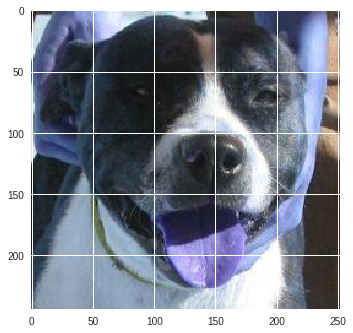

In [19]:
img=cv2.imread("Image-Read/animals/dogs/dogs_00018.jpg")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
b = np.expand_dims(img1, axis=0)
res=model.predict(b)
print(label_name[int(res)])

plt.imshow(img)

In [20]:
print(classification_report(testY, model.predict(testX),	target_names=le.classes_))

              precision    recall  f1-score   support

        cats       0.39      0.51      0.44       239
        dogs       0.37      0.48      0.42       249
       panda       0.82      0.35      0.50       262

   micro avg       0.45      0.45      0.45       750
   macro avg       0.53      0.45      0.45       750
weighted avg       0.53      0.45      0.45       750

